# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

# Импорт библотек

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-pastel')
import seaborn as sns 
import numpy as np 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import time
from tqdm import tqdm 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Рассчитаем эффективность обогащения

In [6]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [7]:
recovery = C * (F - T) / (F * (C - T)) * 100

In [8]:
print('MAE:',(abs(recovery - data_train['rougher.output.recovery']).sum()) / len(data_train))
#нашли MAE по формуле

MAE: 9.73512347450521e-15


Показетль MAE мал , а значит чем ниже MAE, тем лучше модель соответствует набору данных.

Анализ признаков, недоступных в тестовой выборке.

In [9]:
unavailable = [i for i in data_train.columns if i not in data_test.columns]
unavailable

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке  отсутствуют этапы, на которых были получены параметры продукта из сырья. Тестовая выборка содержит в себе исходные столбцы,  то есть до начала обогащения. Нам следует удалить с обучающей выборки все , чего нет в тестовой.

# Предобработка данных

In [10]:
dfs = [data_train, data_test, data_full]

In [11]:
for df in dfs:
    print('_____')
    print('Размер:', df.shape)
    print('Пропуски:', df.isna().sum().sum())
    print('Дубликаты:', df.duplicated().sum())
    

_____
Размер: (14149, 87)
Пропуски: 4100
Дубликаты: 0
_____
Размер: (5290, 53)
Пропуски: 90
Дубликаты: 0
_____
Размер: (19439, 87)
Пропуски: 4481
Дубликаты: 0


In [12]:
#data_train.set_index('date', inplace=True)
#data_test.set_index('date', inplace=True)
#data_full.set_index('date', inplace=True)

Заполним пропущенные значения значением из предыдущей строки

In [13]:
for df in dfs:
    df.fillna(method='ffill', inplace=True)

In [14]:
for df in dfs:
    print('_____')
    print('Размер:', df.shape)
    print('Пропуски:', df.isna().sum().sum())
    print('Дубликаты:', df.duplicated().sum())

_____
Размер: (14149, 87)
Пропуски: 0
Дубликаты: 0
_____
Размер: (5290, 53)
Пропуски: 0
Дубликаты: 0
_____
Размер: (19439, 87)
Пропуски: 0
Дубликаты: 0


**Вывод**:
- Изучили данные , проверили на наличие пропусков и дубликатов
- Заполнили пропуски значением в прошлой или следующей строке.

## Анализ данных

# Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [15]:
AU = data_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
            'final.output.concentrate_au']].dropna()
AG = data_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
            'final.output.concentrate_ag']].dropna()
PB = data_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
            'final.output.concentrate_pb']].dropna()

In [16]:
print('Концентрация до флотации:')
print('Золото:',AU['rougher.input.feed_au'].median(),'Серебро:',
AG['rougher.input.feed_ag'].median(),'Свинец:',
PB['rougher.input.feed_pb'].median())

Концентрация до флотации:
Золото: 8.125838836648287 Серебро: 8.593574167368724 Свинец: 3.5282347219520145


In [17]:
print('Концентрация после флотации:')
print('Золото:', AU['rougher.output.concentrate_au'].median(),'Серебро:',
AG['rougher.output.concentrate_ag'].median(),'Свинец:',
PB['rougher.output.concentrate_pb'].median())

Концентрация после флотации:
Золото: 20.280214025891475 Серебро: 12.098114967346191 Свинец: 7.742580079502529


In [18]:
print('Концентрация после первичной очистки:')
print('Золото:', AU['primary_cleaner.output.concentrate_au'].median(),'Серебро:',
AG['primary_cleaner.output.concentrate_ag'].median(),'Свинец:',
PB['primary_cleaner.output.concentrate_pb'].median())

Концентрация после первичной очистки:
Золото: 32.841295480233306 Серебро: 8.507297972365805 Свинец: 10.142270415359071


In [19]:
print('Финальный концентрат:')
print('Золото:', AU['final.output.concentrate_au'].median(),'Серебро:',
AG['final.output.concentrate_ag'].median(),'Свинец:',
PB['final.output.concentrate_pb'].median())

Финальный концентрат:
Золото: 45.01124391455689 Серебро: 5.066039118467836 Свинец: 10.10226350598865


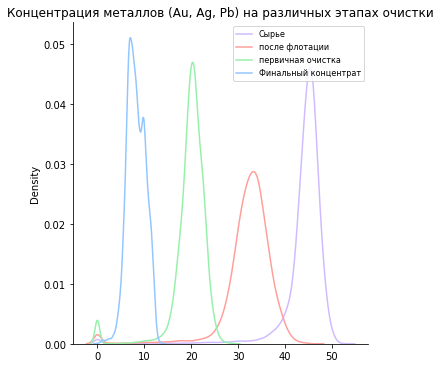

In [20]:
sns.displot(AU, legend=False, kind='kde')
plt.legend(['Сырье', 'после флотации', 'первичная очистка', 'Финальный концентрат'], fontsize=8)
plt.title('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки')
plt.show()

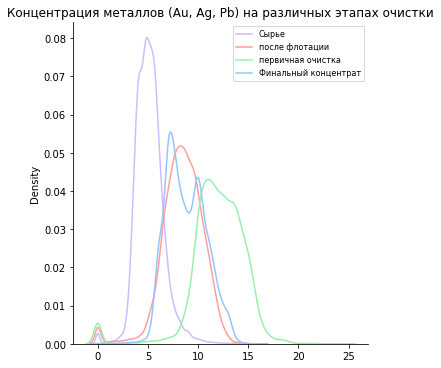

In [21]:
sns.displot(AG, legend=False, kind='kde')
plt.legend(['Сырье', 'после флотации', 'первичная очистка', 'Финальный концентрат'], fontsize=8)
plt.title('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки')
plt.show()

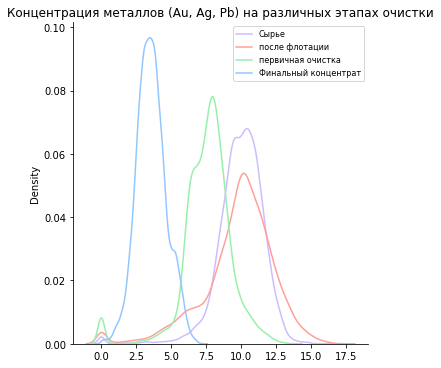

In [22]:
sns.displot(PB, legend=False, kind='kde')
plt.legend(['Сырье', 'после флотации', 'первичная очистка', 'Финальный концентрат'], fontsize=8)
plt.title('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки')
plt.show()

С каждым этапом очистки концетрация золота сильно увеличивается, а серебро наоборот уменьшается. Свинец показывает небольшое увелечение концентрации.

# Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

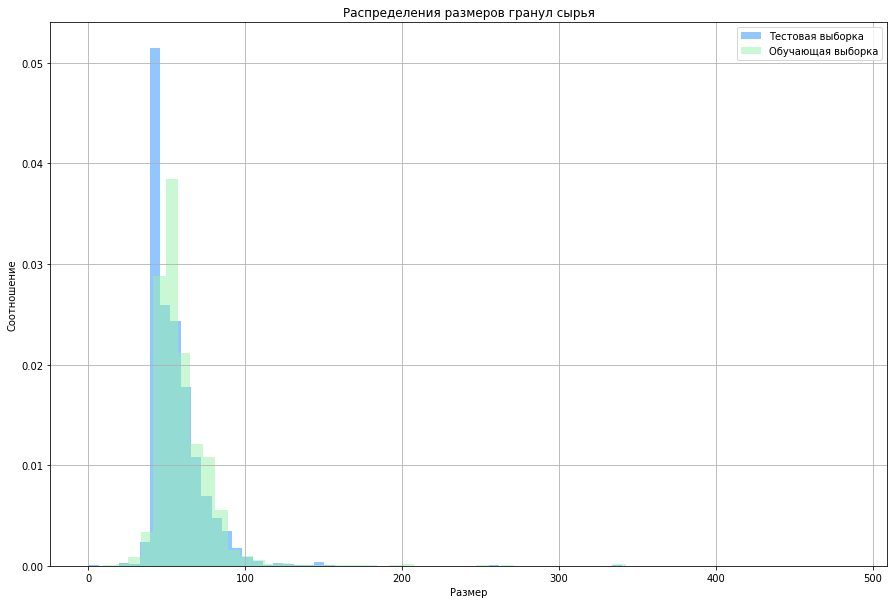

In [23]:
data_test['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=1, density=True)
data_train['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=0.5, density=True)
plt.legend(['Тестовая выборка', 'Обучающая выборка'])
plt.title('Распределения размеров гранул сырья')
plt.xlabel('Размер')
plt.ylabel('Соотношение')
plt.show()

Распределение не сильно разнятся, оценка модели будет правлиьной.

# Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 


In [24]:
concentrate = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol'] +\
  data_full['rougher.input.feed_au']

rougher_concentrate = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] +\
    data_full['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']

final_concentrate = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] +\
    data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au']

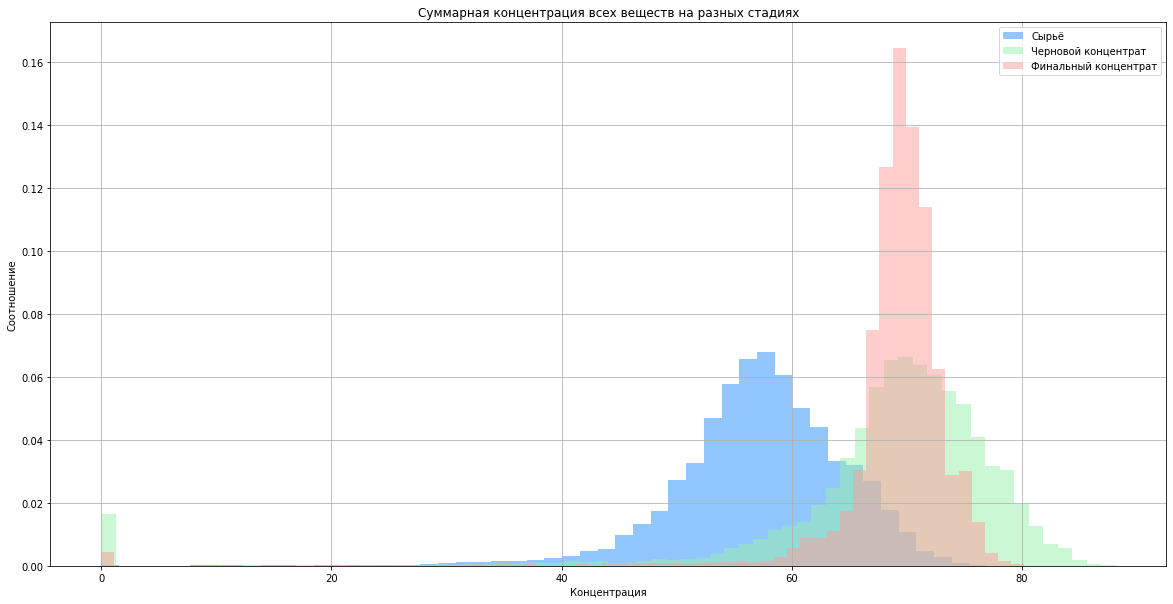

In [25]:
concentrate.hist(figsize=(12, 7), bins=50, alpha=1, density=True)
rougher_concentrate.hist(figsize=(20, 10), bins=70, alpha=0.5, density=True)
final_concentrate.hist(figsize=(20, 10), bins=70, alpha=0.5, density=True)
plt.legend(['Сырьё', 'Черновой концентрат', 'Финальный концентрат'])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Концентрация')
plt.ylabel('Соотношение')
plt.show()

Удалим строки с пустыми значениями.

In [26]:
data_train = data_train.query ('@rougher_concentrate !=0')

In [27]:
data_train = data_train.query('@final_concentrate !=0')

In [28]:
data_full = data_full.query('@rougher_concentrate !=0')

In [29]:
data_full = data_full.query('@final_concentrate !=0')

In [30]:
data_test = data_test.query('@rougher_concentrate !=0')

In [31]:
data_test = data_test.query('@final_concentrate !=0')

# Вывод
- Концентрация золота постепенно увеличивается с каждой очисткой
- Концентрация свинца увеличивается, как и концентрация золота , но не таким темпом
- Концентрация серебра уменьшается
- Распределение не сильно разнятся, оценка модели будет правлиьной.
- Строки с пустым значением концетрации удалены

## Модель

# Функция для вычисления итоговой sMAPE.

In [32]:
def smape(target_actual, target_predictions):
 
    error = 1 / len(target_actual) * np.sum(np.abs(target_actual - target_predictions) / ((np.abs(target_actual) + np.abs(target_predictions)) / 2)) * 100 
    return error

In [33]:
def final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * smape(target_actual_final, target_predictions_final)

In [34]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

# Обучение разных моделей и оценка их качества кросс-валидацией. 

In [35]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')

In [36]:
test_features = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
test_target = data_test[['rougher.output.recovery', 'final.output.recovery']]

In [37]:
data_train = data_train.drop('date', axis =1)
train_features = data_train.drop(unavailable, axis = 1)
train_target = data_train[['rougher.output.recovery', 'final.output.recovery']]

In [38]:
%%time

model = LinearRegression()
model.fit(train_features, train_target)
predictions_lr = model.predict(test_features)
print('Mean R2 from CV of LinearRegression =', cross_val_score(model, train_features, train_target, cv=5).mean())
print('Mean sMAPE from CV of LinearRegression =', cross_val_score(model, train_features, train_target, cv=5, scoring = smape_scorer).mean())
print('Результат модели:', model.score(train_features, train_target))
lr_pred = pd.DataFrame(predictions_lr, columns = ['rough', 'final']) 
print(pd.concat([test_target.reset_index(drop=True), lr_pred], axis = 1))

Mean R2 from CV of LinearRegression = -0.4303203665910288
Mean sMAPE from CV of LinearRegression = -12.171356408153265
Результат модели: 0.2807968743843136
      rougher.output.recovery  final.output.recovery      rough      final
0                   89.993421              70.273583  91.292692  73.630929
1                   88.089657              68.910432  92.513780  74.040162
2                   88.412756              68.143213  92.519447  74.158932
3                   87.360133              67.776393  92.388055  74.473848
4                   83.236367              61.467078  93.023903  72.659630
...                       ...                    ...        ...        ...
5168                95.172585              68.919891  88.768507  73.876074
5169                94.575036              68.440582  87.023731  76.655549
5170                93.018138              67.092759  86.021688  75.730192
5171                92.599042              68.061186  87.942460  73.392976
5172               

Случайный лес

In [39]:
rfr = RandomForestRegressor(random_state = 12345)

In [40]:
gip_param =  {'n_estimators' : [10,20,30],
              'max_depth' : [2,4,6]
              }

In [41]:
giper = GridSearchCV(estimator = rfr, param_grid = gip_param, cv = 5, scoring = smape_scorer)
giper.fit(train_features, train_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [42]:
giper.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=30, random_state=12345)

In [43]:
%%time

model = RandomForestRegressor(n_estimators = 30, max_depth = 4)
model.fit(train_features, train_target)
predictions_rf = model.predict(test_features)
print('Mean R2 from CV of RandomForestRegressor =', cross_val_score(model, train_features, train_target, cv=5).mean())
print('Mean sMAPE from CV of RandomForestRegressor =', cross_val_score(model, train_features, train_target, cv=5, scoring = smape_scorer).mean())
print('Результат модели:', model.score(train_features, train_target))
rf_pred = pd.DataFrame(predictions_rf, columns = ['rough', 'final']) 
print(pd.concat([test_target.reset_index(drop=True), rf_pred], axis = 1))

Mean R2 from CV of RandomForestRegressor = -0.05236149500190366
Mean sMAPE from CV of RandomForestRegressor = -10.39547611875366
Результат модели: 0.37702130267021955
      rougher.output.recovery  final.output.recovery      rough      final
0                   89.993421              70.273583  86.618213  69.452620
1                   88.089657              68.910432  86.618213  69.452620
2                   88.412756              68.143213  86.618213  69.452620
3                   87.360133              67.776393  86.618213  69.452620
4                   83.236367              61.467078  86.618213  69.452620
...                       ...                    ...        ...        ...
5168                95.172585              68.919891  86.792102  69.565562
5169                94.575036              68.440582  87.396905  69.866152
5170                93.018138              67.092759  87.771567  70.097826
5171                92.599042              68.061186  87.771567  70.097826
5172    

Решающее дерево

In [44]:
dtr = DecisionTreeRegressor(random_state = 12345)

In [45]:
parameters={"max_depth" : [2,4,6],
           "min_samples_leaf":[1,2,3,4,5],
           "max_leaf_nodes":[None,10,20,30] }

In [46]:
tuning_model=GridSearchCV(dtr,param_grid=parameters, scoring= smape_scorer,cv=5)


In [47]:
tuning_model.fit(train_features, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [2, 4, 6],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [48]:
tuning_model.best_params_

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}

In [49]:
%%time

model = DecisionTreeRegressor (max_depth = 4, max_leaf_nodes = 20, min_samples_leaf = 1)
model.fit(train_features, train_target)
predictions_dt = model.predict(test_features)
print('Mean R2 from CV of DecisionTreeRegressor =', cross_val_score(model, train_features, train_target, cv=5).mean())
print('Mean sMAPE from CV of DecisionTreeRegressor =', cross_val_score(model, train_features, train_target, cv=5, scoring=smape_scorer).mean())
print('Результат модели:', model.score(train_features, train_target))
dt_pred = pd.DataFrame(predictions_dt, columns = ['rough', 'final']) 
print(pd.concat([test_target.reset_index(drop=True), dt_pred], axis = 1))

Mean R2 from CV of DecisionTreeRegressor = -0.09294498972555496
Mean sMAPE from CV of DecisionTreeRegressor = -10.819405683380937
Результат модели: 0.33773323746723316
      rougher.output.recovery  final.output.recovery      rough     final
0                   89.993421              70.273583  86.544735  69.20794
1                   88.089657              68.910432  86.544735  69.20794
2                   88.412756              68.143213  86.544735  69.20794
3                   87.360133              67.776393  86.544735  69.20794
4                   83.236367              61.467078  86.544735  69.20794
...                       ...                    ...        ...       ...
5168                95.172585              68.919891  86.544735  69.20794
5169                94.575036              68.440582  86.544735  69.20794
5170                93.018138              67.092759  86.544735  69.20794
5171                92.599042              68.061186  86.544735  69.20794
5172              

Проверим на адекватность

In [50]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features, train_target)
dummy_pred = dummy_regr.predict(test_features)
print('dummy sMAPE:', final_smape(test_target, dummy_pred))

dummy sMAPE: 8.033678765182529


In [55]:
%%time

model = RandomForestRegressor(n_estimators = 30, max_depth = 4)
model.fit(train_features, train_target)
predicted = model.predict(test_features)
smape_test = final_smape(test_target,predicted)
print('Итоговый sMAPE на тестовой выборке:', smape_test)

Итоговый sMAPE на тестовой выборке: 6.8859841115396625
CPU times: user 5.87 s, sys: 19.6 ms, total: 5.89 s
Wall time: 5.89 s


## Вывод:
- Импортировали библиотеки и данные
- Рассчитали эффективность обогащения , Показетль MAE мал ,  модель соответствует набору данных.
- Произвели предобработку данных, заменили пропуски на предыдущие и следущие значения
- Проанализировали изменение концентрации металлов на разных этапах очистки.С каждым этапом очистки концетрация золота сильно увеличивается
- Сравнили распределение  размеров гранул сырья на обучающей и тестовой выборках. Данные не сильно разнятся.
- Удалили строки с пустыми значениями.
- Объявили функцию для вычисления итоговой метрики sMAPE
- Проведено исследование разных моделей машинного обучения с различными гиперпараметрами
- Была выявлена лучшая модель
- Для данной задачи лучше всего подходит RandomForestRegressor